<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Exploratory Data Analysis of Financial Stock Data</h1>

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
data = pd.read_csv('stock_details_5_years.csv')

data source: https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset/

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [3]:
data.head()

Date   Open   High    Low  Close     Volume  \
0  2018-11-29 00:00:00-05:00  43.83  43.86  42.64  43.08  167080000   
1  2018-11-29 00:00:00-05:00 104.77 105.52 103.53 104.64   28123200   
2  2018-11-29 00:00:00-05:00  54.18  55.01  54.10  54.73   31004000   
3  2018-11-29 00:00:00-05:00  83.75  84.50  82.62  83.68  132264000   
4  2018-11-29 00:00:00-05:00  39.69  40.06  38.74  39.04   54917200   

   Dividends  Stock Splits Company  
0       0.00          0.00    AAPL  
1       0.00          0.00    MSFT  
2       0.00          0.00   GOOGL  
3       0.00          0.00    AMZN  
4       0.04          0.00    NVDA

In [4]:
data.tail()

Date  Open  High   Low  Close   Volume  \
602957  2023-11-29 00:00:00-05:00 26.36 26.40 26.12  26.15  1729147   
602958  2023-11-29 00:00:00-05:00 27.68 28.53 27.68  28.35  1940066   
602959  2023-11-29 00:00:00-05:00 75.94 76.56 75.26  75.61   298699   
602960  2023-11-29 00:00:00-05:00 45.23 45.26 44.04  44.21  2217579   
602961  2023-11-29 00:00:00-05:00 84.63 85.00 83.53  83.89   830092   

        Dividends  Stock Splits Company  
602957       0.00          0.00     PPL  
602958       0.00          0.00    FITB  
602959       0.00          0.00     IFF  
602960       0.00          0.00     CCJ  
602961       0.00          0.00     LYV

In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company'],
      dtype='object')

In [6]:
data.shape

(602962, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [8]:
data.describe()

Open      High       Low     Close        Volume  Dividends  \
count 602962.00 602962.00 602962.00 602962.00     602962.00  602962.00   
mean     140.07    141.85    138.28    140.10    5895601.18       0.01   
std      275.40    279.00    271.90    275.48   13815961.83       0.12   
min        1.05      1.06      1.03      1.03          0.00       0.00   
25%       39.57     40.06     39.06     39.56    1031500.00       0.00   
50%       79.18     80.13     78.19     79.18    2228700.00       0.00   
75%      157.84    159.75    155.84    157.85    5277400.00       0.00   
max     6490.26   6525.00   6405.00   6509.35 1123003300.00      35.00   

       Stock Splits  
count     602962.00  
mean           0.00  
std            0.05  
min            0.00  
25%            0.00  
50%            0.00  
75%            0.00  
max           20.00

In [9]:
len(data.Company.unique())

491

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Extract useful information from Date</h4>

In [10]:
data['Date'] = data['Date'].astype(str).str[:10]

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
data['month'] = data['Date'].dt.month_name()
data['year'] = data['Date'].dt.year
data['day'] = data['Date'].dt.day_name()

In [13]:
data.head()

Date   Open   High    Low  Close     Volume  Dividends  Stock Splits  \
0 2018-11-29  43.83  43.86  42.64  43.08  167080000       0.00          0.00   
1 2018-11-29 104.77 105.52 103.53 104.64   28123200       0.00          0.00   
2 2018-11-29  54.18  55.01  54.10  54.73   31004000       0.00          0.00   
3 2018-11-29  83.75  84.50  82.62  83.68  132264000       0.00          0.00   
4 2018-11-29  39.69  40.06  38.74  39.04   54917200       0.04          0.00   

  Company     month  year       day  
0    AAPL  November  2018  Thursday  
1    MSFT  November  2018  Thursday  
2   GOOGL  November  2018  Thursday  
3    AMZN  November  2018  Thursday  
4    NVDA  November  2018  Thursday

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Sort Data by year and month</h4>

In [14]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

data.sort_values(by=['year', 'month'], inplace=True)

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

In [15]:
import matplotlib.pyplot as plt
# import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

sns.set(style="whitegrid")

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Which company have the highest daily stock record?</h4>

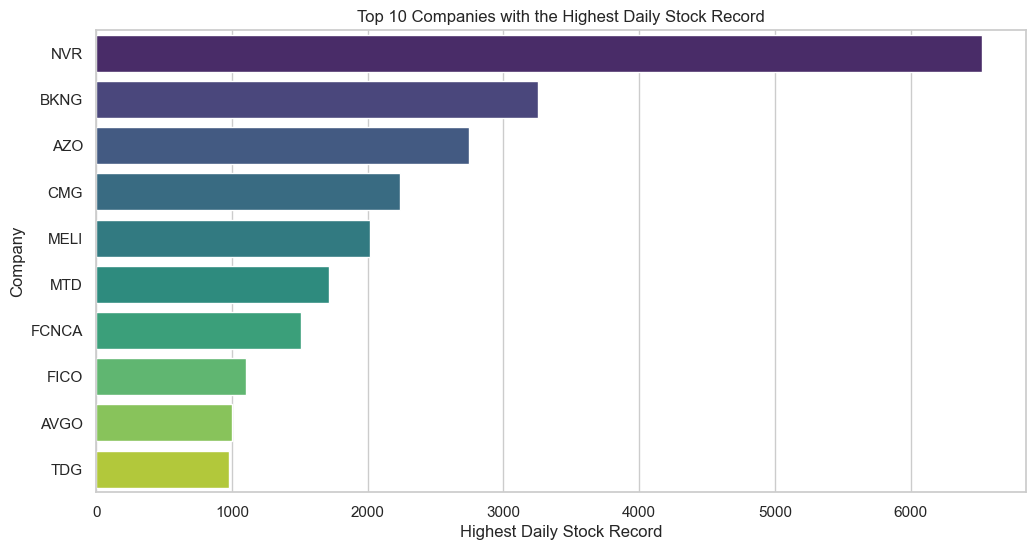

In [16]:
# Group by 'Company' and find the maximum 'High' value for each
top_companies = data.groupby('Company')['High'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='viridis')

plt.xlabel('Highest Daily Stock Record')
plt.ylabel('Company')
plt.title('Top 10 Companies with the Highest Daily Stock Record')

plt.show()

The dataset contains approximately 603 thousand stock records from 491 different companies. NVR Inc and Booking Holdings Inc (BKNG) have the highest single daily stock record.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">What is the average trading volume across all companies?</h4>

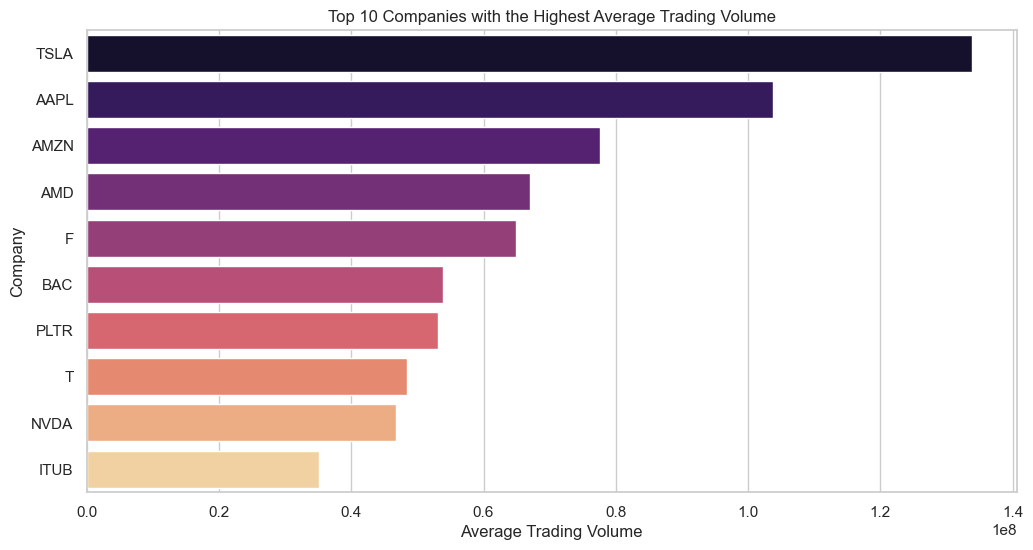

In [17]:
# Calculate the average trading volume for each company
average_volume = data.groupby('Company')['Volume'].mean().sort_values(ascending=False)

# Take the top 10 companies based on average trading volume
top_10_average_volume = average_volume.head(10)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_average_volume.values, y=top_10_average_volume.index, palette='magma')

# Setting plot labels and title
plt.xlabel('Average Trading Volume')
plt.ylabel('Company')
plt.title('Top 10 Companies with the Highest Average Trading Volume')

# Display the plot
plt.show()

Tesla Inc and Apple Inc have the highest average trading volume. 

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Are there any notable patterns or trends in stock prices in the TOP companies?</h4>

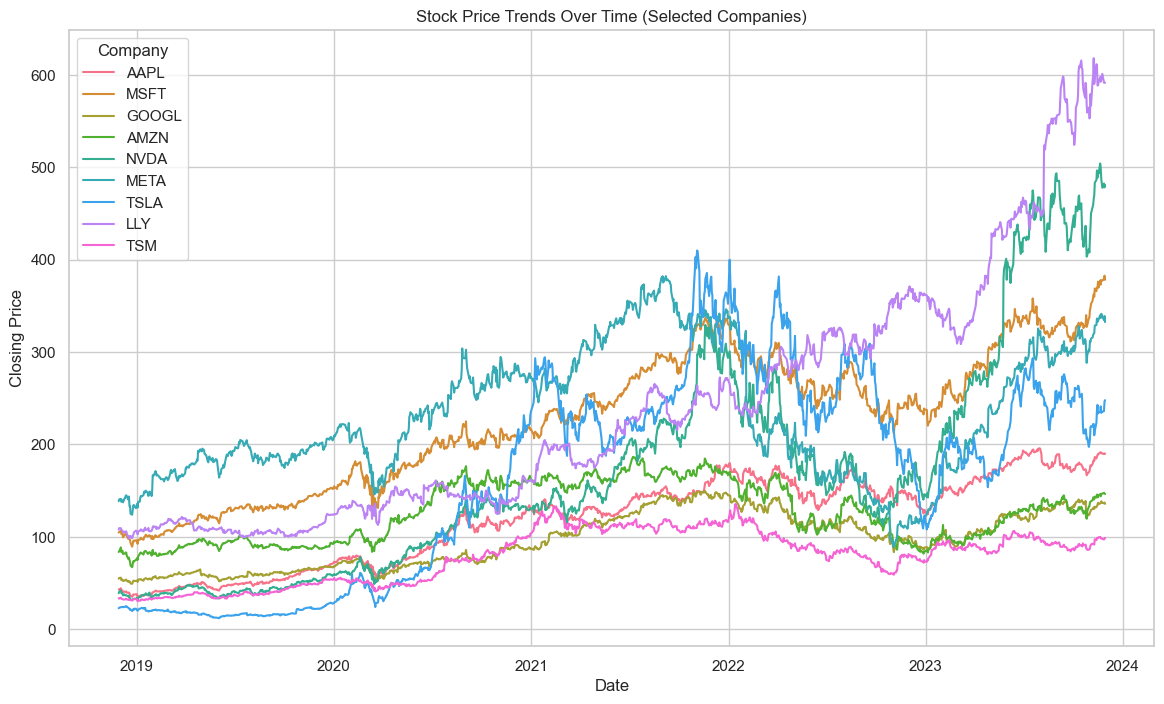

In [18]:
# Filter data for the specified companies
selected_companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'LLY', 'TSM']
selected_data = data[data['Company'].isin(selected_companies)]

# Plotting using seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Close', hue='Company', data=selected_data, palette='husl')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Price Trends Over Time (Selected Companies)')

# Display the plot
plt.show()

In [19]:
import plotly.express as px

# Filter data for the specified companies
selected_companies = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'LLY', 'TSM']
selected_data = data[data['Company'].isin(selected_companies)]

# Plotting using plotly express
fig = px.line(selected_data, x='Date', y='Close', color='Company',
              labels={'Close': 'Closing Price', 'Date': 'Date'},
              title='Stock Price Trends Over Time (Selected Companies)',
              template='plotly_dark')

# Show the plot
fig.show()

A striking trend we can observe is that from 2019 up to 2021, Meta stocks top the Price chart. However, there is a retrogradation from 2021 to 2023. A tentative reason would be that this is due to the Pandemic. 
Another striking observation is that Eli Lilly and Company (LLY) stock has been increasing steadily from 2019 and now tops the price chart. Hence, a potential investment opportunity is to invest in LLY stocks. 


<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> How do stock prices perform during different months or quarters?</h4>

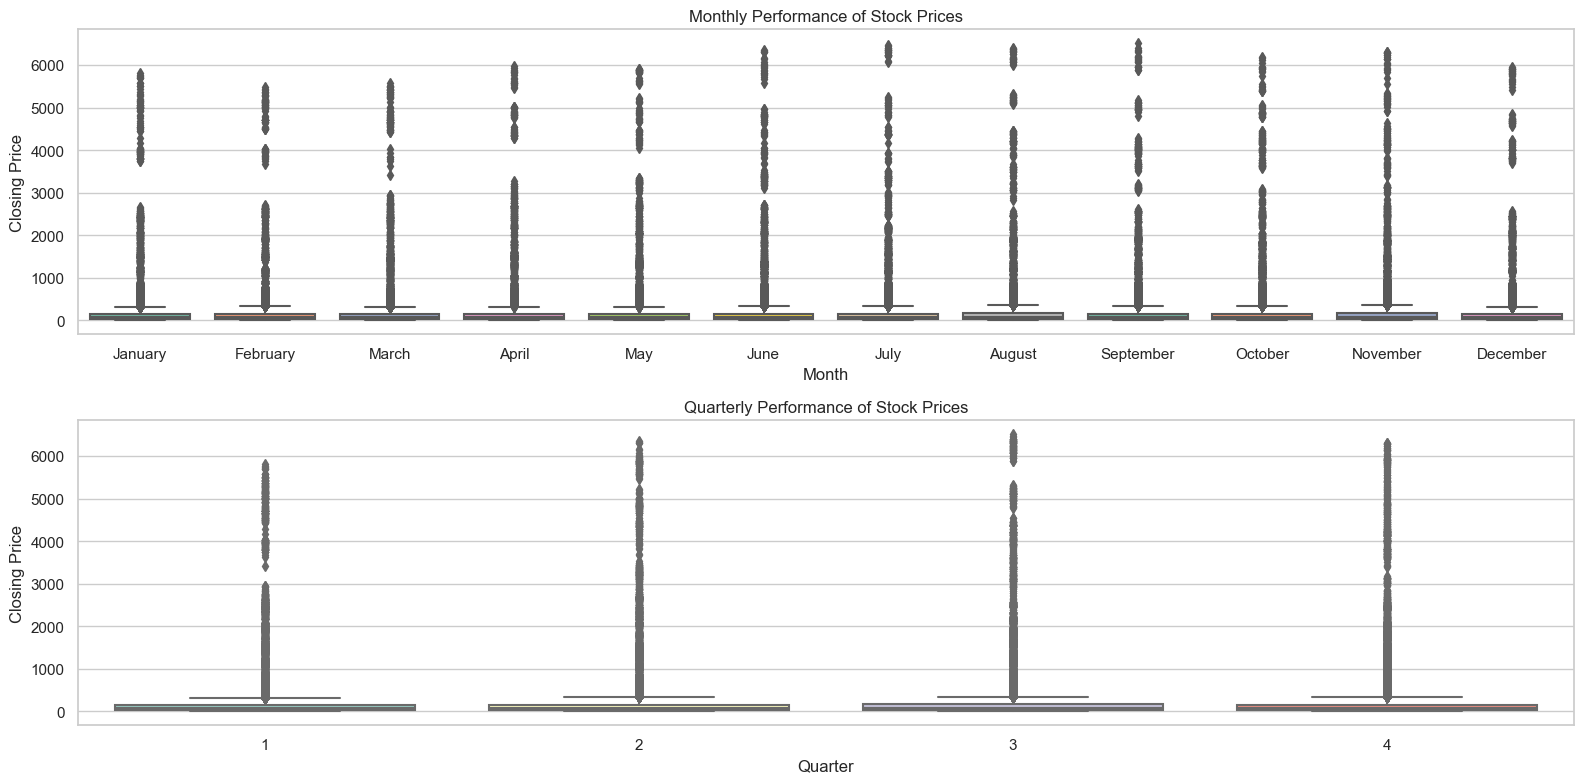

In [20]:
data['quarter'] = data['Date'].dt.quarter

# Plotting monthly performance
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, plot 1
sns.boxplot(x='month', y='Close', data=data, palette='Set2')
plt.title('Monthly Performance of Stock Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')

# Plotting quarterly performance
plt.subplot(2, 1, 2)  # 2 rows, 1 column, plot 2
sns.boxplot(x='quarter', y='Close', data=data, palette='Set3')
plt.title('Quarterly Performance of Stock Prices')
plt.xlabel('Quarter')
plt.ylabel('Closing Price')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

June, July, August and September have a higher stock price.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Volume and Price Relationship</h4>

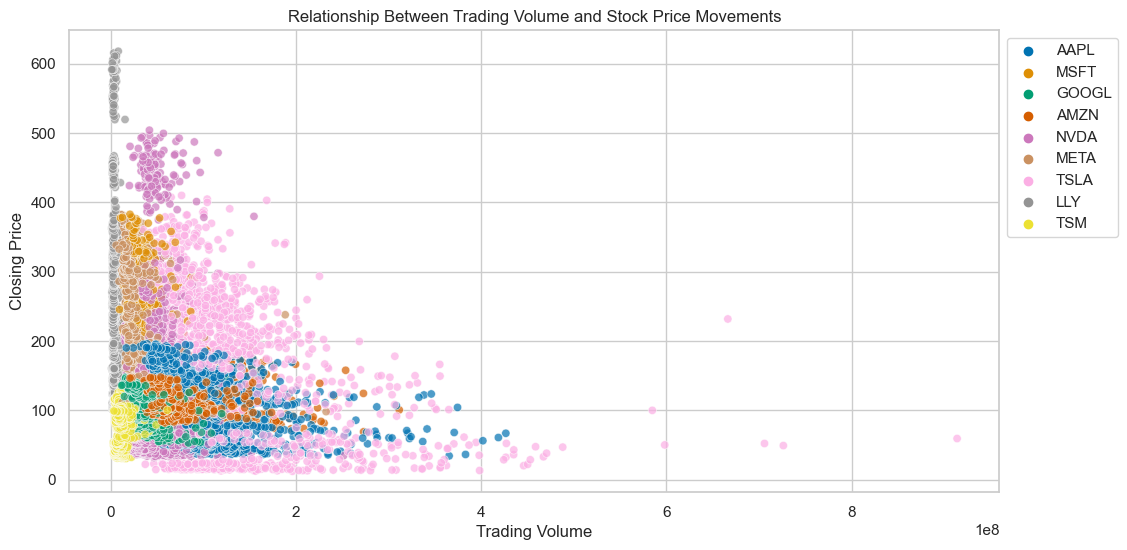

In [21]:
# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Volume', y='Close', data=selected_data, hue='Company', palette='colorblind', alpha=0.7)

# Setting plot labels and title
plt.xlabel('Trading Volume')
plt.ylabel('Closing Price')
plt.title('Relationship Between Trading Volume and Stock Price Movements')

# Display legend
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# Display the plot
plt.show()

It can be observed that for Tesla, as the trading volume increases, there is a decrease in closing price.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Are there any patterns in stock splits that can be associated with positive or negative performance?</h4>

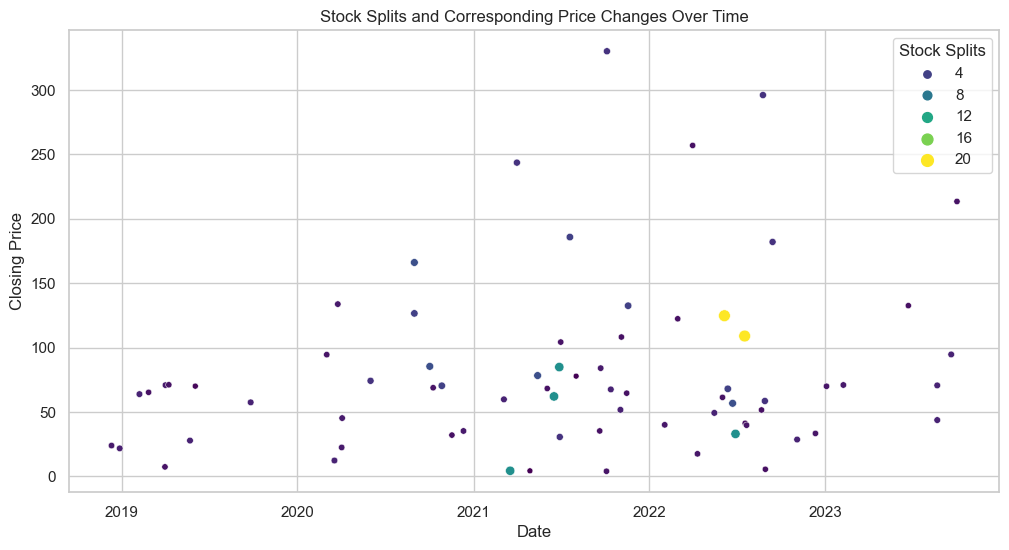

In [22]:
# Filter data for rows with stock splits
split_data = data[data['Stock Splits'] != 0]

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='Close', hue='Stock Splits', size='Stock Splits', data=split_data, palette='viridis')

# Setting plot labels and title
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Splits and Corresponding Price Changes Over Time')

# Display the plot
plt.show()

There is no notable trend between stock splits and corresponding price changes. The datapoints are just everywhere.

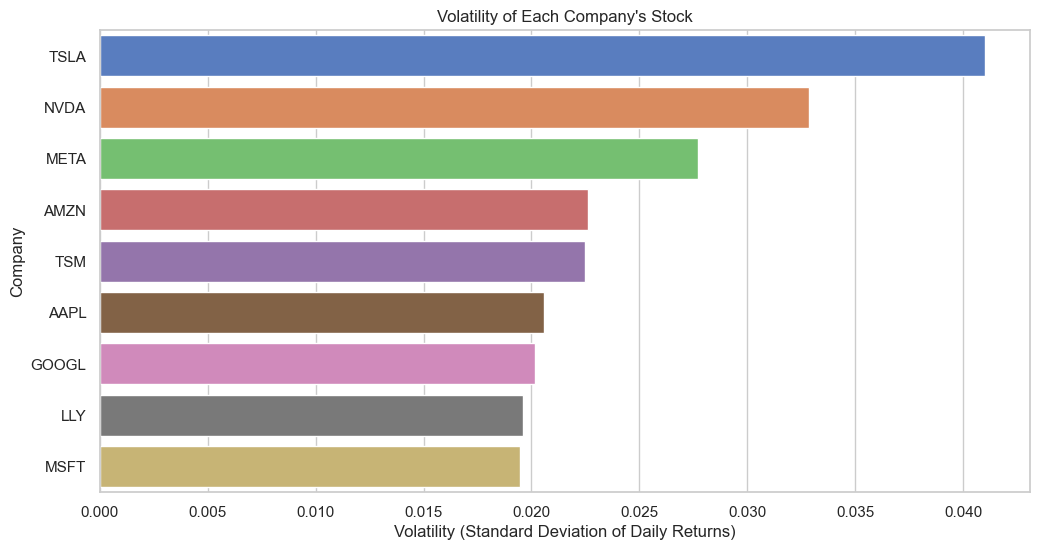

In [23]:
# Calculate daily returns of selected top companies
selected_data['Daily_Return'] = selected_data.groupby('Company')['Close'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility = selected_data.groupby('Company')['Daily_Return'].std().sort_values(ascending=False)

# Plotting using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=volatility.values, y=volatility.index, palette='muted')

# Setting plot labels and title
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Company')
plt.title('Volatility of Each Company\'s Stock')

# Display the plot
plt.show()


TESLA, NVIDIA and META are the top companies with the highest volatility. 

Volatility in stocks refers to the degree of variation of a stock’s price over time. A high volatility stock is one that experiences large fluctuations in price over a short period of time. This means that the stock’s price can change dramatically over a short time period in either direction.

A high volatility stock is inherently riskier, but that risk cuts both ways. It also has the potential for greater returns